In [1]:
import pandas as pd
import matplotlib.colors as colors
import joblib
import glob

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [4]:
#function which reads all csv files in a folder and returns a dataframe representation
def getCSVData():
    
    #declare variable to hold data frame
    df = pd.DataFrame()
    
    #declare variable to hold cleaned CSV data
    cleanedData = []
    
    #get reference to all CSV files in subfolders        
    pathname = "data/**/*.csv"
    allFiles = []    
    
    for file in glob.iglob(pathname, recursive=True):
        allFiles.append(file)    
    
    #for each CSV file in specified path
    for aFile in allFiles:   
         
        #reading CSV data
        CSVData = pd.read_csv(aFile, usecols=['Latitude', 'Longitude'])     
        
        #filter out any CSV rows with missing data          
        CSVData = CSVData.loc[pd.notna(CSVData['Latitude'])
                        & pd.notna(CSVData['Longitude'])]
        
        #append data to array of all data
        cleanedData.append(CSVData)
        
    #convert to data frame
    df = pd.concat(cleanedData) 
  
    #rearrange columns
    df = df[['Latitude', 'Longitude']]    
   
    #return the data frame
    return df

#populate data frame with cleaned CSV data from files
df = getCSVData()

#inspect data
df

,Latitude,Longitude
0,51.375673,-2.400736
1,53.762222,-2.461766
2,53.762754,-2.451775
3,53.768343,-2.454551
4,53.762509,-2.462042
...,...,...
16846,53.842843,-3.014279
16847,53.841978,-3.014486
16848,53.847695,-3.015536
16849,53.843795,-3.009028


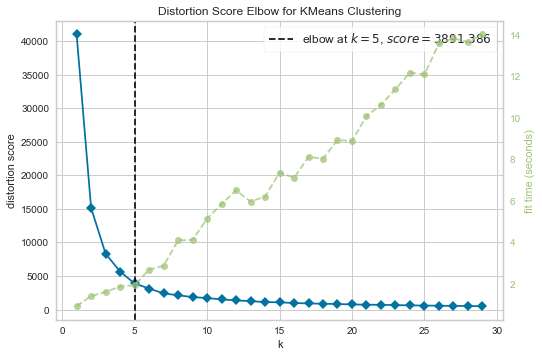

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [7]:
#Although the elbow test specifies an optimal value of 5 clusters, 
#due to the necessity to narrow the crime prediction area, a larger 
#number of clusters was decided at 30 (for lancashire)

# create kmeans model/object
kmeans = KMeans(
    init='random',
    n_clusters=30,
    random_state=49
)

In [8]:
#complete clustering of location data
kMeansModel = kmeans.fit(df)

#store cluster results
labels = kMeansModel.labels_

In [9]:
#add cluster values to data frame
df['Cluster'] = labels
print(df)

        Latitude  Longitude  Cluster
0      51.375673  -2.400736        9
1      53.762222  -2.461766        1
2      53.762754  -2.451775        1
3      53.768343  -2.454551        1
4      53.762509  -2.462042        1
...          ...        ...      ...
16846  53.842843  -3.014279       15
16847  53.841978  -3.014486       15
16848  53.847695  -3.015536       15
16849  53.843795  -3.009028       15
16850  53.843175  -3.006778       15

[428938 rows x 3 columns]


In [10]:
#check how many locations assigned to each cluster
counts = df.groupby('Cluster').count()
print(counts)

         Latitude  Longitude
Cluster                     
0           23063      23063
1           18066      18066
2           18218      18218
3            7964       7964
4            7516       7516
5           34988      34988
6           15981      15981
7           30306      30306
8            2827       2827
9              82         82
10          25670      25670
11          18118      18118
12           5162       5162
13          11229      11229
14           9802       9802
15           7231       7231
16          18522      18522
17           6784       6784
18           2893       2893
19          10269      10269
20          26389      26389
21          11882      11882
22           2778       2778
23          12579      12579
24          18217      18217
25          12634      12634
26          10987      10987
27          19804      19804
28             75         75
29          38902      38902


In [ ]:
import folium
colors = ['red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'white',
    'orange',
    'yellow',
    'green',
    'lightgreen',
    'cadetblue',
    'darkred',
    'blue',
    'red',    
    'cadetblue',
    'darkred',
    'lightred',
    'yellow',
    'beige',
    'green',
    'darkgreen']   

#random.shuffle(colors)

#SET to middle of lancashire
#lat = df.iloc[0]['Latitude'] #ensure that all lat and lons are within location zone e.g. lancs
#lng = df.iloc[0]['Longitude']

#SET to middle of lancashire
lat = 53.765762
lon = -2.692337

map = folium.Map(location=[lat, lon], zoom_start=10)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6, #10
        weight=0.6, #2
        fill=True, 
        fill_color=colors[int(row['Cluster'])],
        fill_opacity=0.4,
        color=colors[int(row['Cluster'])]
    ).add_to(map)

#display map
map

In [11]:
# save the model to disk
filename = 'KMeansCluster_FINAL.sav'

#show model
print(kMeansModel.__class__.__name__)

#save model to file
joblib.dump(kMeansModel, filename)

#load model from file
myClusterModel = joblib.load(filename)

myClusterModel

KMeans


KMeans(init='random', n_clusters=30, random_state=49)

In [15]:
#TEST SAVE DATA with clusters
#save df to file to check cluster
#TEST SAVE DF data to check crime type
df = df.sort_values(by=['Cluster'], ascending=True)
df.to_csv(r'clusterDFtest.csv', index = False)


In [16]:
#Test 

#53.76806556, -2.7738555  Preston cluster 11
#53.80798969, -3.0528945  Blackpool cluster 16
location = myClusterModel.predict([[53.76806556, -2.7738555]])

#print(location) #  [16] 
location.item(0) #   16

10